## 🐾 Project 2: Classify Animals (Mammal, Bird, Reptile)

### 📝 Description:

Students will classify animals based on physical features like number of legs, whether it lays eggs, or lives in water.

### 📁 Dataset:

You can create a small custom dataset for simplicity. Here's an example dataset:

| Name      | Legs | Has\_Fur | Lays\_Eggs | Lives\_In\_Water | Class   |
| --------- | ---- | -------- | ---------- | ---------------- | ------- |
| Dog       | 4    | 1        | 0          | 0                | Mammal  |
| Eagle     | 2    | 0        | 1          | 0                | Bird    |
| Crocodile | 4    | 0        | 1          | 1                | Reptile |
| Cat       | 4    | 1        | 0          | 0                | Mammal  |
| Penguin   | 2    | 0        | 1          | 1                | Bird    |

### 💡 Concepts:

* Multi-class classification
* Label encoding
* Decision Tree for interpretability
* Model accuracy and confusion matrix

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Define the dataset
data = {
    "Legs": [4, 2, 4, 4, 2],
    "Has_Fur": [1, 0, 0, 1, 0],
    "Lays_Eggs": [0, 1, 1, 0, 1],
    "Lives_In_Water": [0, 0, 1, 0, 1],
    "Class": ["Mammal", "Bird", "Reptile", "Mammal", "Bird"]
}
df = pd.DataFrame(data)

In [3]:
# 2. Encode target
le = LabelEncoder()
df["Class_encoded"] = le.fit_transform(df["Class"])  # Mammal=1, Bird=0, Reptile=2

In [4]:
# 3. Prepare features and target
X = df[["Legs", "Has_Fur", "Lays_Eggs", "Lives_In_Water"]]
y = df["Class_encoded"]

In [5]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 5. Train decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
# 6. Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 1.00


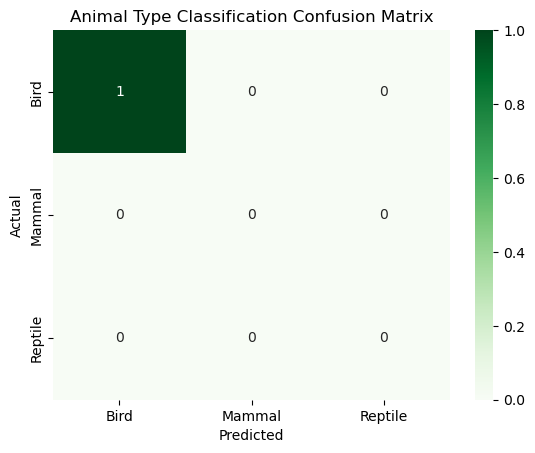

In [9]:
# 7. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(conf_matrix, annot=True, cmap="Greens", 
            xticklabels=le.inverse_transform([0, 1, 2]), 
            yticklabels=le.inverse_transform([0, 1, 2]))
plt.title("Animal Type Classification Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 🖼️ Visualization: Confusion Matrix – Animal Classification

### 📊 What You See:

* A **heatmap** showing a **3x3 confusion matrix** with rows = actual labels and columns = predicted labels
* Axis labels: `'Bird'`, `'Mammal'`, `'Reptile'`
* Cells contain integer values — the number of times the model made each type of prediction

---

## 🔍 How to Interpret:

### 🎯 Diagonal Cells (Correct Predictions):

* Each cell on the **diagonal** (from top-left to bottom-right) shows how many times the model correctly classified an animal.

  * For example: If the model correctly predicted "Bird", the number will appear in row "Bird", column "Bird".

### ⚠️ Off-Diagonal Cells (Incorrect Predictions):

* Off-diagonal cells show **errors**:

  * If you see a number in row “Bird” and column “Mammal”, it means a **Bird was misclassified as a Mammal**.
  * This helps students understand where and how the model is making mistakes.

---

## 📈 Example (Sample Output Might Look Like):

|                | Predicted Bird | Predicted Mammal | Predicted Reptile |
| -------------- | -------------- | ---------------- | ----------------- |
| Actual Bird    | 1              | 0                | 0                 |
| Actual Mammal  | 0              | 2                | 0                 |
| Actual Reptile | 0              | 1                | 0                 |

* ✅ The model **correctly classified** 1 Bird and 2 Mammals.
* ❌ It **misclassified** 1 Reptile as a Mammal.
* This gives you a visual clue on **which class the model struggles with**.

---

## 🧠 Summary:

| Element             | Meaning                                                 |
| ------------------- | ------------------------------------------------------- |
| Heatmap Grid        | Each cell counts how often that classification occurred |
| Diagonal values     | Correct classifications                                 |
| Off-diagonal values | Misclassifications                                      |
| Axis Labels         | Class names for actual vs. predicted                    |
| Color Intensity     | Higher number = darker color = more occurrences         |